Tim Market Research & City Performance Airbnb Bangkok merupakan unit yang bertanggung jawab untuk menganalisis tren pasar dan kinerja operasional Airbnb di wilayah Bangkok. Tim ini berfokus pada pengumpulan, pengolahan, dan interpretasi data listing guna memahami perilaku pasar, memantau performa kota, serta memberikan rekomendasi berbasis data bagi pengambilan keputusan manajerial. Sebagai Junior Data Analyst di dalam tim ini, saya berperan dalam melakukan analisis eksploratif terhadap data listing Airbnb di Bangkok dan menyajikan hasilnya dalam bentuk laporan serta dashboard interaktif untuk mendukung kebutuhan City Performance Manager.

Jadi kesimpulannya:

Tim Market Research & City Performance = tim riset dan analitik yang fokus memahami performa bisnis Airbnb di tingkat kota, termasuk tren harga, sebaran lokasi, aktivitas host-tamu, dan potensi pertumbuhan.

# 1. Latar Belakang
Airbnb merupakan platform akomodasi global yang menjadi pilihan utama wisatawan di Bangkok, salah satu kota dengan permintaan akomodasi tertinggi di Asia Tenggara. Namun, meningkatnya jumlah host dan variasi listing menyebabkan kompetisi harga yang ketat serta fluktuasi tingkat okupansi (occupancy rate) di berbagai area kota.

Sebagai bagian dari Tim Market Research & City Performance Airbnb Bangkok, analisis diperlukan untuk memahami bagaimana strategi harga dan ketersediaan (availability) memengaruhi tingkat okupansi dan pendapatan host. Melalui pendekatan berbasis data, perusahaan dapat membantu host menetapkan harga yang kompetitif dan optimal, sekaligus menjaga ketersediaan properti yang sesuai dengan tren permintaan pasar.


## 2. Pernyataan Masalah
Meskipun data historis listing Airbnb di Bangkok menunjukkan variasi besar dalam harga, tipe kamar, dan ketersediaan, belum diketahui secara pasti **bagaimana kombinasi faktor-faktor tersebut memengaruhi tingkat okupansi dan potensi pendapatan host**.

Sebagai Junior Data Analyst, tugas saya adalah melakukan analisis untuk menjawab pertanyaan berikut:

1. Bagaimana strategi penetapan harga dan ketersediaan listing dapat dioptimalkan untuk meningkatkan tingkat okupansi dan pendapatan host di Bangkok?”

Analisis ini akan digunakan oleh City Performance Manager untuk merumuskan rekomendasi strategi harga dan kebijakan pasar yang lebih efektif bagi host di wilayah Bangkok.

# 3. Data Understanding
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini].

**3.1 Penjelasan Tahap**

Tahap Data Understanding bertujuan untuk memahami isi, struktur, dan konteks dataset yang digunakan.
Langkah ini penting untuk mengenali variabel-variabel yang tersedia, mengetahui jenis data (numerik atau kategorikal), dan memastikan kesesuaian data dengan tujuan analisis.

**3.2 Deskripsi Dataset**

Dataset ini berisi informasi mengenai daftar properti Airbnb di Bangkok, Thailand.
Setiap baris merepresentasikan satu listing unik, yang berisi detail tentang lokasi, host, tipe kamar, harga, dan aktivitas penyewaan.

**3.3 Variabel Utama**

Terdapat 14 kolom di dalam dataset Airbnb Listings Bangkok, yaitu:

| **Kolom** | **Deskripsi** |
|------------|----------------|
| `id` | ID unik untuk setiap listing Airbnb. |
| `name` | Nama dari listing atau properti yang terdaftar. |
| `host_id` | ID unik untuk setiap host atau pemilik properti. |
| `host_name` | Nama host yang mengelola listing. |
| `neighborhood` | Area atau wilayah tempat listing berada di Bangkok. |
| `latitude` | Koordinat garis lintang lokasi listing. |
| `longitude` | Koordinat garis bujur lokasi listing. |
| `room_type` | Jenis kamar yang ditawarkan (Entire home/apt, Private room, Shared room, Hotel room). |
| `price` | Harga sewa per malam (dalam mata uang lokal). |
| `minimum_nights` | Jumlah malam minimum yang harus dipesan oleh tamu. |
| `number_of_reviews` | Jumlah total ulasan yang diterima listing. |
| `last_review` | Tanggal ulasan terakhir yang diterima listing. |
| `calculated_host_listings_count` | Jumlah total listing yang dimiliki oleh host di area tersebut. |
| `availability_365` | Jumlah hari dalam satu tahun di mana listing tersedia untuk disewa. |



Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
"""file CSV menyimpan index sebagai kolom tambahan bernama “Unnamed: 0”. 
Kolom ini tidak memiliki informasi dan harus dibuang agar dataset bersih."""
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
display(df)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## 4. Data Cleaning 


Tahap **Data Cleaning & Preparation** adalah proses penting sebelum melakukan analisis. Tujuannya adalah memastikan data bersih, rapi, dan siap dipakai sehingga hasil analisis dapat dipercaya.


Pada dataset Airbnb Bangkok, beberapa isu umum yang harus dibersihkan meliputi:
- **Duplikasi** (listing ganda)
- **Missing values** (nilai kosong)
- **Tipe data tidak sesuai** (misal harga masih dalam bentuk string)
- **Outlier harga ekstrem**
- **Pemilihan variabel relevan** untuk menjawab Business Problem

# 4.1 Pengecekan Informasi Dataset

Sebelum membersihkan data, penting untuk memahami kondisi awal dataset.
- Tipe data setiap fitur
- Jumlah nilai hilang (missing values)
- Variasi nilai (unique values)
- Contoh nilai pada tiap kolom

In [4]:
# Melihat struktur umum dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

print("\nJumlah Missing Values Sebelum Cleaning:\n")
print(df.isnull().sum())

print("\nContoh Data (5 Baris Teratas):")
display(df.head())

# Deskripsi fitur: tipe data, missing, unique, contoh nilai
listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(1).values)
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=["Fitur", "Tipe Data", "Missing", "Unique", "Contoh Nilai"]
)

print("\nRingkasan Struktur Dataset:")
display(dfDesc)

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0



Ringkasan Struktur Dataset:


,Fitur,Tipe Data,Missing,Unique,Contoh Nilai
0,id,int64,0,15854,[39646371]
1,name,object,8,14794,[Heart of Bangkok with King size bed at Asok t...
2,host_id,int64,0,6659,[217662805]
3,host_name,object,1,5312,[Tanachai]
4,neighbourhood,object,0,50,[Bang Rak]
5,latitude,float64,0,9606,[13.76855]
6,longitude,float64,0,10224,[100.5243]
7,room_type,object,0,4,[Hotel room]
8,price,int64,0,3040,[5391]
9,minimum_nights,int64,0,86,[27]


## 4.2 Pemeriksaan & Penghapusan Duplikasi
Mengidentifikasi dan menghapus baris duplikat dalam DataFrame berdasarkan kolom 'id' untuk memastikan setiap daftar adalah unik. Jika ada duplikasi, itu dapat mendistorsi analisis harga atau ketersediaan.

In [5]:
print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")
# Identifikasi baris duplikat berdasarkan kolom 'id'
duplicate_rows = df.duplicated(subset=['id'])

print(f"Dimensi dataset setelah menghapus duplikasi: {df.shape}")
# Tampilkan jumlah baris duplikat yang ditemukan
num_duplicates = duplicate_rows.sum()
print(f"Jumlah baris duplikat yang ditemukan (berdasarkan 'id'): {num_duplicates}")

# Hapus baris duplikat, pertahankan kemunculan pertama
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

# Verifikasi bahwa tidak ada duplikat yang tersisa
num_duplicates_after_removal = df.duplicated(subset=['id']).sum()
print(f"Jumlah baris duplikat setelah penghapusan: {num_duplicates_after_removal}")
print(f"Jumlah dimensi dataset setelah menghapus duplikat: {df.shape}")

Jumlah baris sebelum menghapus duplikat: 15854
Dimensi dataset setelah menghapus duplikasi: (15854, 16)
Jumlah baris duplikat yang ditemukan (berdasarkan 'id'): 0
Jumlah baris duplikat setelah penghapusan: 0
Jumlah dimensi dataset setelah menghapus duplikat: (15854, 16)


## 4.3 Penghapusan Kolom Tidak Relevan
Pada tahap ini, dilakukan penghapusan beberapa kolom yang tidak memiliki kontribusi langsung terhadap analisis Pricing & Occupancy Optimization.

Tujuannya adalah untuk:
- menyederhanakan dataset,
- mengurangi noise yang tidak perlu,
- memfokuskan analisis pada fitur-fitur yang relevan,
- meningkatkan kecepatan serta kejelasan proses analisis.

Meskipun kolom-kolom ini mungkin berguna untuk analisis lain (misalnya analisis spasial atau studi perilaku ulasan), namun untuk konteks business problem ini—menentukan harga optimal dan mempelajari pola ketersediaan—kolom-kolom tersebut tidak memberikan nilai informasi yang signifikan.

- `host_id` = Identifier host; tidak memiliki hubungan langsung dengan harga
- `latitude, longitude` = Analisis ini tidak membahas pola geospasial; lokasi cukup direpresentasikan oleh neighbourhood
- `last_review` = Tanggal ulasan terakhir tidak berpengaruh terhadap harga maupun availability saat ini
- `reviews_per_month` = Banyak missing, redundant dengan "number_of_reviews", dan tidak digunakan dalam analisis utama
- `number_of_reviews_ltm` = Overlap dengan total review; tidak relevan untuk pricing analysis


In [6]:
kolom_tidak_relevan = [ 
    'host_id', 
    'latitude', 
    'longitude', 
    'last_review', 
    'reviews_per_month', 
    'number_of_reviews_ltm'
]

df.drop(columns=kolom_tidak_relevan, inplace=True, errors='ignore')
print("\nKolom tidak relevan telah dihapus.")

print("Kolom yang tersisa saat ini:")
print(df.columns)


Kolom tidak relevan telah dihapus.
Kolom yang tersisa saat ini:
Index(['id', 'name', 'host_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


## 4.4 Penanganan Missing Values
Handling missing values penting agar analisis tidak bias. Tidak semua kolom harus diisi; beberapa lebih baik dibiarkan kosong jika mewakili kondisi sebenarnya.

Pada dataset Airbnb Bangkok,
Kolom yang diperbaiki:
- `name` → bisa diganti dengan "Unknown Listing" jika kosong.
- `host_name` → aman diganti dengan "Unknown Host" karena tidak mempengaruhi analisis pricing.

Kolom yang dihapus:
- `reviews_per_month` → kolom dihapus karena tidak relevan dan terlalu banyak missing values (lebih dari 5.000 baris).
- `last_review` → tidak relevan terhadap business problem dan tidak memberikan kontribusi berarti terhadap analisis harga maupun occupancy.

In [7]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
id                                0
name                              8
host_name                         1
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [8]:
df['name'].fillna("Unknown Listing", inplace=True)
df['host_name'].fillna("Unknown Host", inplace=True)

print("\nMissing values setelah imputasi pada name & host_name:")
print(df.isnull().sum())


Missing values setelah imputasi pada name & host_name:
id                                0
name                              0
host_name                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## 4.6 Menangani Outlier Harga
Outlier dapat mengganggu distribusi dan membuat analisis harga menjadi bias.
Metode paling umum untuk mengidentifikasi dan menangani outlier pada kolom 'price' menggunakan metode Interquartile Range (IQR) untuk memastikan data harga lebih representatif.




In [9]:
print("Statistik Deskriptif untuk kolom 'price':")
print(df['price'].describe())

Statistik Deskriptif untuk kolom 'price':
count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64


In [10]:
# Menghitung IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Batas Bawah untuk Outlier: {lower_bound}")
print(f"Batas Atas untuk Outlier: {upper_bound}")

# Identifikasi outliers
outliers_lower = df[df['price'] < lower_bound]
outliers_upper = df[df['price'] > upper_bound]

print(f"\nAngka outlier dibawah batas bawah: {len(outliers_lower)}")
print(f"Angka outlier diatas batas atas: {len(outliers_upper)}")
print(f"Total angka outlier: {len(outliers_lower) + len(outliers_upper)}")


Q1 (25th percentile): 900.0
Q3 (75th percentile): 2429.0
IQR (Interquartile Range): 1529.0
Batas Bawah untuk Outlier: -1393.5
Batas Atas untuk Outlier: 4722.5

Angka outlier dibawah batas bawah: 0
Angka outlier diatas batas atas: 1403
Total angka outlier: 1403


# Penanganan Outlier Harga

Setelah outlier teridentifikasi, langkah selanjutnya adalah melakukan penanganan untuk menjaga kualitas distribusi harga:

* Karena tidak ditemukan outlier di bawah batas bawah, fokus penanganan dilakukan pada nilai yang melebihi batas atas.
* Nilai harga yang melebihi batas atas akan **dikapitasi (winsorized)** dengan menetapkannya ke nilai batas atas.
* Pendekatan ini menjaga data tetap berada dalam rentang yang wajar tanpa menghapus observasi.
* Dengan demikian, distribusi harga menjadi lebih stabil dan analisis tidak terdistorsi oleh nilai ekstrem.

In [11]:
# Melakukan winsorizing (membatasi nilai harga agar berada dalam batas wajar)
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

print("Statistik deskriptif untuk kolom 'price' setelah penanganan outlier:\n")
print(df['price'].describe())

# Memastikan kembali apakah masih ada outlier setelah proses winsorizing
outliers_bawah_setelah = df[df['price'] < lower_bound]
outliers_atas_setelah = df[df['price'] > upper_bound]

print("\nJumlah outlier di bawah batas bawah setelah penanganan:", len(outliers_bawah_setelah))
print("Jumlah outlier di atas batas atas setelah penanganan:", len(outliers_atas_setelah))
print("Total outlier setelah penanganan:", len(outliers_bawah_setelah) + len(outliers_atas_setelah))


Statistik deskriptif untuk kolom 'price' setelah penanganan outlier:

count    15854.000000
mean      1843.158351
std       1270.767794
min          0.000000
25%        900.000000
50%       1429.000000
75%       2429.000000
max       4722.500000
Name: price, dtype: float64

Jumlah outlier di bawah batas bawah setelah penanganan: 0
Jumlah outlier di atas batas atas setelah penanganan: 0
Total outlier setelah penanganan: 0


## 4.7 Pemilihan Kolom Relevan (Feature Selection)
Karena Business Problem yang ditargetkan *Pricing & Occupancy Optimization*, tidak semua kolom dataset diperlukan.
Berikut kolom yang relevan:

**Identitas Unik Listing**
- `id` = identifier unik (tidak mengandung informasi untuk pricing or occupancy)

**Fitur untuk Pricing Analysis**

- `price` = Variabel target untuk analisis pricing
- `room_type` = Faktor utama yang mempengaruhi harga
- `neighborhood` = Perbedaan lokasi = perbedaan harga

---

**Fitur untuk Occupancy Proxy**

- `availability_365` = Representasi tingkat ketersediaan/occupancy
- `number_of_reviews` = Proksi demand dan popularitas

---

**Fitur Pendukung**

- `minimum_nights` = Mempengaruhi convension rate booking
- `calculated_host_listings_count` = Melihat perbedaan strategi host kecil vs host besar
- `name`(opsional) = Berguna saat meninjau outlier atau listing tertentu
- `host_name`(opsional) = Membantu analisis pola host

In [12]:
# Daftar kolom yang relevan untuk analisis Pricing & Occupancy
kolom_relevan = [
    'id',
    'name',
    'host_name',
    'neighbourhood',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365'
]

# Mengecek apakah semua kolom relevan ada di dataframe
kolom_tidak_ada = [col for col in kolom_relevan if col not in df.columns]

if len(kolom_tidak_ada) > 0:
    print("Kolom berikut tidak ditemukan di dataset:")
    print(kolom_tidak_ada)
else:
    print("Semua kolom relevan tersedia di dataset.")

# Membuat dataframe baru berisi kolom relevan saja
df_relevant = df[kolom_relevan].copy()

print("\nDimensi dataset dengan kolom relevan:")
print(df_relevant.shape)

print("\nPreview dataset kolom relevan:")
display(df_relevant.head())

Semua kolom relevan tersedia di dataset.

Dimensi dataset dengan kolom relevan:
(15854, 10)

Preview dataset kolom relevan:


,id,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,Nuttee,Ratchathewi,Entire home/apt,1905.0,3,65,2,353
1,27979,"Easy going landlord,easy place",Emy,Bang Na,Private room,1316.0,1,0,2,358
2,28745,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room,800.0,60,0,1,365
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286.0,7,2,1,323
4,941865,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room,1905.0,1,0,3,365


In [13]:
# Tambahkan validasi setelah cleaning
print("\n=== VALIDASI SETELAH DATA CLEANING ===")
print(f"Shape akhir: {df_relevant.shape}")
print(f"Missing values akhir: {df_relevant.isnull().sum().sum()}")
print(f"Duplikat akhir: {df.duplicated().sum()}")
print(f"Range harga setelah cleaning: {df_relevant['price'].min()} - {df_relevant['price'].max()}")


=== VALIDASI SETELAH DATA CLEANING ===
Shape akhir: (15854, 10)
Missing values akhir: 0
Duplikat akhir: 0
Range harga setelah cleaning: 0.0 - 4722.5


## Ringkasan Data Cleaning & Preparation
## **Hasil Akhir Setelah Data Cleaning**
- Dataset **bebas dari duplikasi**.
- **Missing values** pada kolom terkait telah ditangani secara tepat.
- **Outlier harga ekstrem** telah ditangani menggunakan metode IQR.
- Beberapa kolom yang **tidak relevan** untuk analisis telah dihapus.
- Dataset telah difokuskan pada **kolom-kolom yang relevan** untuk analisis harga dan ketersediaan.

Dataset sekarang **sepenuhnya siap** untuk tahap *Exploratory Data Analysis (EDA)*.

## **Tujuan Tahap Data Cleaning**
Tahap ini dilakukan untuk:
- Membersihkan nilai yang hilang atau tidak valid  
- Menghapus baris yang menggandakan informasi  
- Menyingkirkan fitur yang tidak memiliki kontribusi pada analisis  
- Menjaga agar dataset akurat, rapi, dan tidak menghasilkan bias dalam analisis

---

## **Tujuan Tahap Data Preparation**
Tahap ini fokus pada:
- Menentukan fitur mana yang **relevan** dengan analisis  
- Menyusun ulang dataset agar lebih terstruktur  
- Menyiapkan dataframe yang lebih ringan dan fokus untuk EDA

---

## **Langkah-Langkah yang Telah Dilakukan**

### **1. Penghapusan Duplikasi**
- Dilakukan pengecekan menggunakan `df.duplicated()`
- Jika ditemukan duplikasi → baris tersebut dihapus  

### **2. Penanganan Missing Values**
- `name` → diisi dengan `"Unknown Listing"`  
- `host_name` → diisi dengan `"Unknown Host"`  
- `last_review` & `reviews_per_month` → dihapus karena tidak relevan dengan analisis harga/availability  
- Tidak ada missing values di kolom numerik utama (price, availability, reviews)

### **3. Penghapusan Kolom Tidak Relevan**
Menghapus fitur yang tidak berkontribusi terhadap business problem:
- `id`, `host_id`  
- `latitude`, `longitude`  
- `last_review`, `reviews_per_month`, `number_of_reviews_ltm`

### **4. Penanganan Outlier Harga (Price Outlier Handling)**
- Menggunakan metode IQR (Q1, Q3, IQR)  
- Outlier ekstrem dipangkas menggunakan `clip()`  
- Distribusi harga menjadi lebih stabil untuk analisis

### **5. Pemilihan Kolom Relevan (Feature Selection)**
Fitur yang akan dipakai dalam analisis:
- `name`
- `host_name`
- `neighbourhood`
- `room_type`
- `price`
- `minimum_nights`
- `number_of_reviews`
- `calculated_host_listings_count`
- `availability_365`

---

## **Hasil**
Dataset yang telah melalui tahapan *Data Cleaning* dan *Preparation* kini:
- Bersih  
- Bebas noise  
- Berisi fitur relevan  
- Siap dianalisis  

Selanjutnya dataset dapat masuk ke tahap **Exploratory Data Analysis (EDA)** untuk menggali pola harga, faktor yang memengaruhi harga, serta hubungannya dengan ketersediaan listing Airbnb di Bangkok.

# Price Analysis – Distribusi Harga Listing

Bagian ini bertujuan memahami pola dasar harga listing Airbnb di Bangkok.  
Analisis distribusi harga penting karena menjadi fondasi untuk menentukan strategi pricing yang optimal bagi host.

Poin yang diperhatikan:
- Rentang harga minimum hingga maksimum  
- Persebaran harga (apakah mayoritas listing murah atau mahal)  
- Adanya potensi skewness yang menunjukkan segmen tertentu dominan  
- Dampak outlier terhadap keseluruhan struktur harga

Hasil analisis ini akan menjadi dasar untuk membandingkan harga lintas tipe kamar, lokasi, dan ketersediaan.

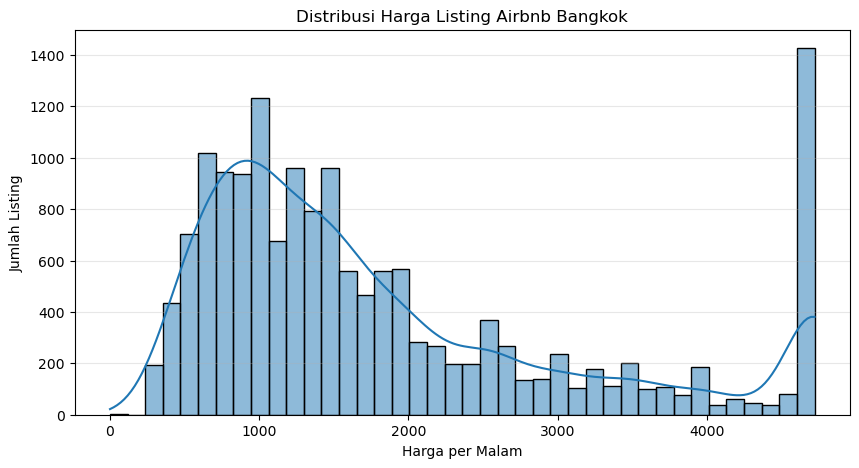

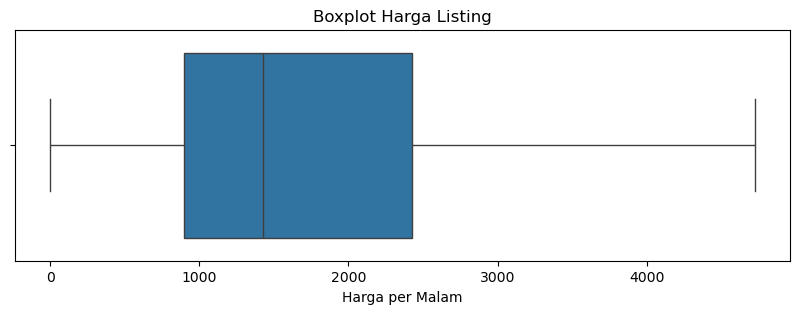

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df_relevant['price'], bins=40, kde=True)
plt.title('Distribusi Harga Listing Airbnb Bangkok')
plt.xlabel('Harga per Malam')
plt.ylabel('Jumlah Listing')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Boxplot untuk melihat potensi segmen harga premium / ekstrem
plt.figure(figsize=(10,3),)
sns.boxplot(x=df_relevant['price'])
plt.title('Boxplot Harga Listing')
plt.xlabel('Harga per Malam')
plt.show()



### Insights - Price Analysis

Berdasarkan grafik distribusi harga, pasar Airbnb Bangkok memiliki karakteristik berikut:

**1. Kompetisi Tinggi di Segmen Budget Rendah hingga Menengah**
- Mayoritas listing berkumpul pada rentang harga **di bawah ฿2,000** per malam
- Strategi pasar berfokus pada wisatawan dengan anggaran terbatas
- Tingkat persaingan antar host di rentang harga ini sangat ketat

**2. Peluang Niche di Segmen Premium**
- Sangat sedikit listing pada harga premium (di atas ฿4,000)
- Persaingan lebih rendah, namun target pasar lebih kecil (niche)
- Membutuhkan ekspektasi layanan yang lebih tinggi

**3. Implikasi Strategi bagi Host**
- Host di segmen menengah perlu fokus pada **penetapan harga yang kompetitif**
- Penting menyesuaikan harga dengan dinamika pasar yang padat
- Diferensiasi layanan diperlukan untuk tetap kompetitif

## Distribusi Tipe Kamar

Room type merupakan salah satu faktor utama yang memengaruhi harga.  
Analisis ini digunakan untuk memahami komposisi penawaran akomodasi di Bangkok. 
Mengetahui tipe kamar yang paling banyak dipasarkan membantu:

- Menentukan tingkat kompetisi di tiap segmen  
- Memahami preferensi pasar  
- Menentukan strategi harga berbeda per tipe kamar  
- Menilai apakah sebuah tipe kamar memiliki peluang premium (karena jumlah listingnya lebih sedikit)  

Temuan ini penting untuk memandu host menentukan harga kompetitif berdasarkan kategori akomodasi yang serupa.

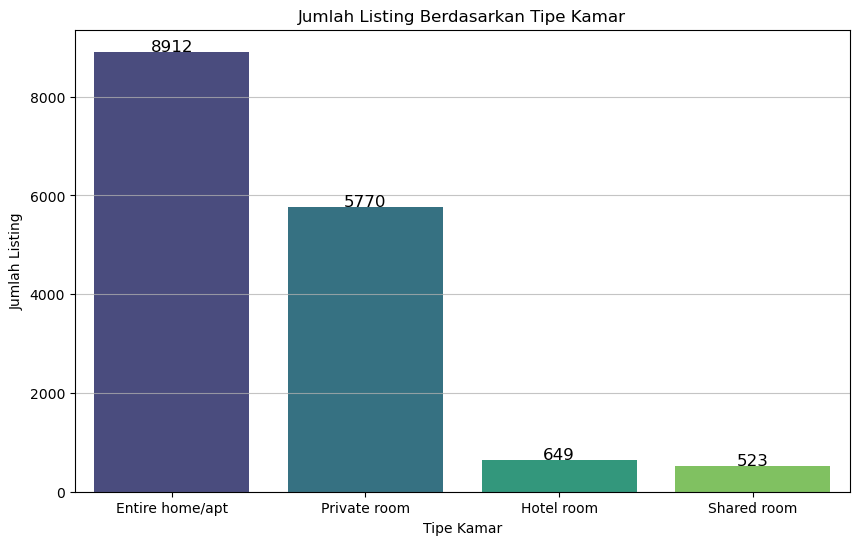

In [15]:
# Create a bar chart of the 'room_type' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='room_type', hue='room_type', palette='viridis', legend=False)
plt.title('Jumlah Listing Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.grid(axis='y', alpha=0.75)

# Menambahkan label di atas tiap bar
for p in ax.patches:
    height = p.get_height()   # tinggi bar
    ax.text(p.get_x() + p.get_width()/2., height + 5,  # posisi label
            int(height), ha="center", fontsize=12)     # isi label dan alignment

**Komposisi Tipe Kamar** didominasi secara absolut oleh Entire home/apt yang mencapai **63%** dari total **15,854** listing, jauh melebihi Private room (36%), Hotel room (4%), dan Shared room (3%). Dominasi Entire home/apt yang melebihi dua-pertiga total pasar ini mengindikasikan **potential oversupply** pada segmen entire unit dibandingkan dengan rasio ideal industri.

### Insights - Distribusi Tipe Kamar

- Private Room adalah tipe kamar yang paling banyak tersedia, menunjukkan bahwa segmen ini memiliki kompetisi tertinggi. 
  Host di kategori ini perlu menonjolkan kualitas listing (foto, fasilitas, review) agar dapat bersaing.
  
- Entire Home/Apt berada di urutan kedua dan cenderung menjadi segmen premium. 
  Meski listingnya lebih sedikit, wisatawan yang mencari privasi penuh bersedia membayar lebih, sehingga potensi pendapatannya lebih tinggi.

- Shared Room sangat sedikit dan bukan segmen utama di Bangkok. 
  Ini menunjukkan bahwa wisatawan di kota ini lebih memilih privasi.

- Hotel Room muncul sebagai alternatif dari hotel tradisional yang memanfaatkan Airbnb sebagai saluran distribusi tambahan.


## Analisis Ketersediaan Listing (Availability 365)

Availability 365 menunjukkan berapa hari dalam satu tahun listing masih tersedia (belum dibooking). 
Analisis ini membantu:

- Mengidentifikasi listing yang performanya baik (availability rendah = banyak booking)  
- Menemukan listing yang permintaannya rendah  
- Memahami pola supply-demand di pasar  
- Menentukan strategi penetapan harga untuk meningkatkan okupansi  


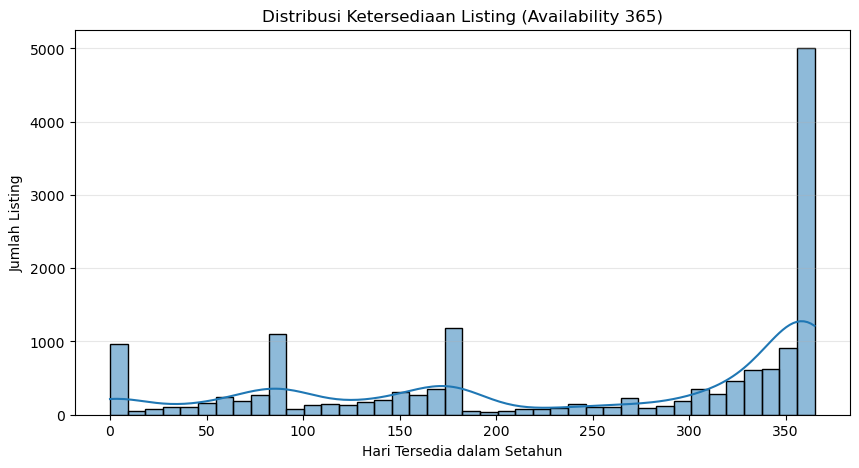

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df_relevant['availability_365'], bins=40, kde=True)
plt.title('Distribusi Ketersediaan Listing (Availability 365)')
plt.xlabel('Hari Tersedia dalam Setahun')
plt.ylabel('Jumlah Listing')
plt.grid(axis='y', alpha=0.3)
plt.show()


### Insights - Hasil Analisis Ketersediaan Listing (Availability 365)

- Terdapat banyak listing dengan availability sangat rendah (mendekati 0 hari). 
  Artinya, listing ini sangat sering dipesan dan memiliki permintaan tinggi. Listing seperti ini bisa dijadikan benchmark untuk strategi harga.

- Banyak juga listing dengan availability sangat tinggi (mendekati 365 hari). 
  Ini mengindikasikan listing tidak mendapat cukup pemesanan, kemungkinan karena harga terlalu tinggi, deskripsi kurang menarik, atau kurangnya review.

- Segmen availability menengah menunjukkan listing yang stabil namun masih memiliki ruang peningkatan untuk menaikkan okupansi melalui optimasi harga.


## Analisis Jumlah Ulasan (Number of Reviews)

Jumlah ulasan menggambarkan tingkat aktivitas dan interaksi tamu terhadap listing. 
Variabel ini berfungsi sebagai proxy permintaan historis.

Analisis ini membantu:
- Mengidentifikasi listing populer  
- Menilai apakah sebuah listing sudah memiliki rekam jejak yang dipercaya tamu  
- Memahami seberapa banyak listing yang masih baru atau kurang performa  


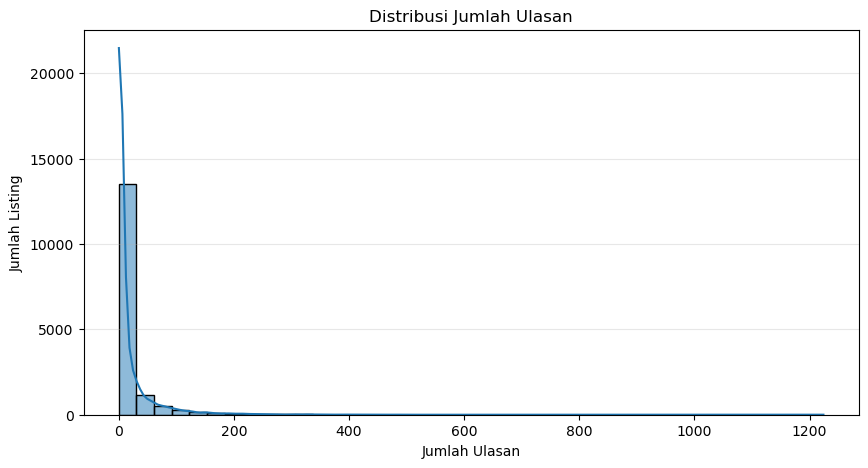

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_relevant['number_of_reviews'], bins=40, kde=True)
plt.title('Distribusi Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Jumlah Listing')
plt.grid(axis='y', alpha=0.3)
plt.show()


### Insights - Hasil Analisis Jumlah Ulasan (Number of Reviews)

- Banyak listing memiliki sedikit atau bahkan tidak memiliki ulasan. 
  Ini menunjukkan bahwa sebagian besar listing baru atau belum berhasil menarik minat tamu. Listing seperti ini membutuhkan optimasi harga atau peningkatan kualitas listing.

- Listing dengan jumlah ulasan tinggi umumnya sudah mapan dan sering dibooking. 
  Listing ini dapat dijadikan contoh sukses untuk menentukan harga optimal atau strategi konten.

- Gap besar antara listing dengan ulasan rendah dan tinggi menunjukkan adanya kompetisi kuat dan kebutuhan diferensiasi yang jelas bagi host baru.


### Ringkasan Temuan Utama (Descriptive Insights)

- Pasar didominasi listing harga rendah–menengah, sehingga strategi pricing kompetitif sangat penting.
- Private Room menjadi segmen paling padat, menandakan kompetisi tertinggi.
- Banyak listing yang sangat sering dibooking (availability rendah), tapi banyak juga listing yang hampir tidak laku.
- Mayoritas listing memiliki ulasan sedikit, sehingga membangun reputasi awal sangat penting untuk menarik booking pertama.


## Analisis Harga Berdasarkan Tipe Kamar (Price vs Room Type)

Tujuan analisis ini adalah untuk memahami bagaimana setiap tipe kamar memengaruhi rentang harga di pasar. 
Perbandingan harga antar tipe kamar penting karena:

- Masing-masing tipe kamar memiliki target tamu berbeda
- Tingkat privasi berbeda menghasilkan willingness-to-pay berbeda
- Membantu host menempatkan harga sesuai segmennya

Analisis ini menjadi dasar untuk menentukan **strategi pricing spesifik per kategori kamar**, bukan menetapkan satu harga umum.


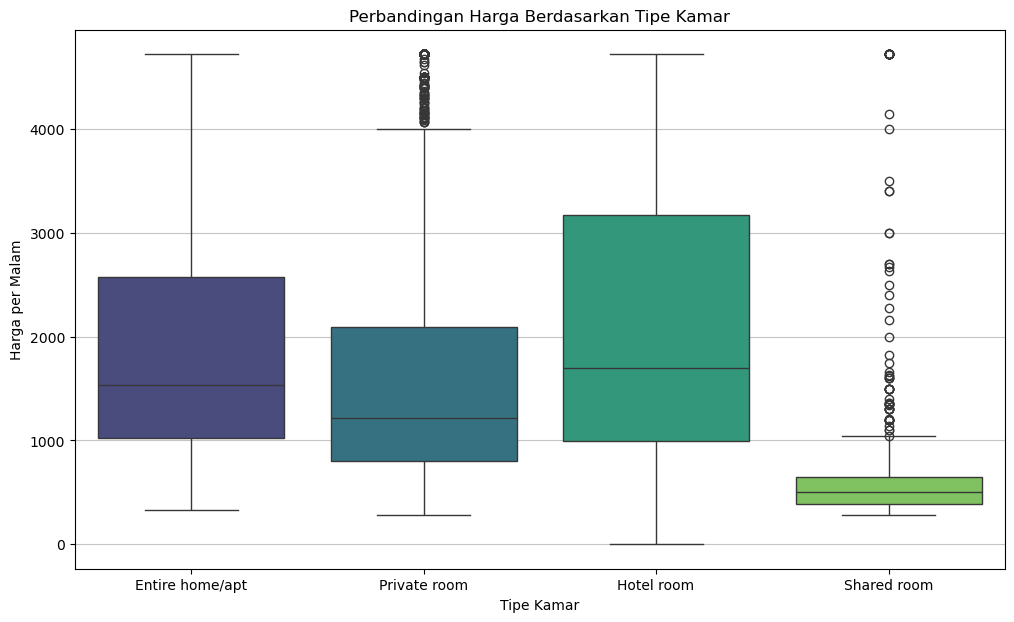

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df_relevant, x='room_type', y='price', hue='room_type', palette='viridis', legend=False)
plt.title('Perbandingan Harga Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga per Malam')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Insights – Price vs Room Type

- **Entire Home/Apt** memiliki harga tertinggi di antara semua tipe kamar. 
  Hal ini wajar karena tipe ini menawarkan privasi penuh dan sering dipilih keluarga atau tamu jangka panjang.

- **Private Room** mendominasi jumlah listing dan memiliki rentang harga menengah. 
  Segmen ini paling kompetitif sehingga penetapan harga harus hati-hati dan mengikuti harga pasar.

- **Hotel Room** cenderung memiliki harga stabil karena mengikuti standar operasional hotel. 
  Listing kategori ini biasanya kurang fleksibel dalam menurunkan harga.

- **Shared Room** memiliki harga paling rendah dan bukan segmen utama di Bangkok.

**Kesimpulan bisnis:**  
Harga sangat bergantung pada room type → **strategi pricing harus selalu disegmentasi berdasarkan tipe kamar.**


## Analisis Harga Berdasarkan Lokasi (Price vs Neighbourhood)

Lokasi adalah salah satu penentu harga paling kuat dalam industri akomodasi.  
Analisis ini penting untuk:

- Mengidentifikasi area high-value (premium)
- Menemukan area dengan kompetisi tinggi
- Menentukan harga yang sesuai dengan market lokal (micro-market)

Harga yang terlalu rendah atau terlalu tinggi dibandingkan listing di daerah yang sama akan mengurangi okupansi atau pendapatan.


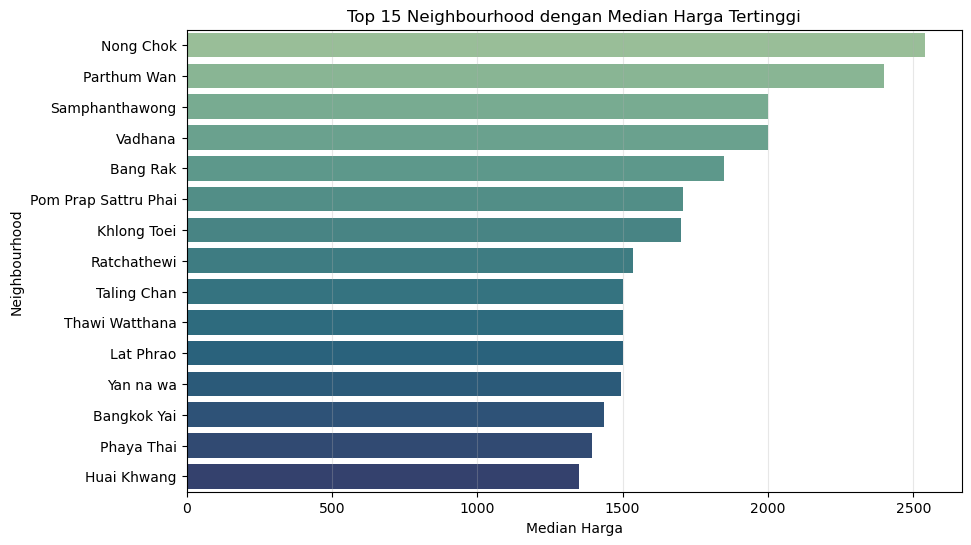

In [19]:
median_price_neigh = df_relevant.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=median_price_neigh.values, y=median_price_neigh.index, palette='crest')
plt.title('Top 15 Neighbourhood dengan Median Harga Tertinggi')
plt.xlabel('Median Harga')
plt.ylabel('Neighbourhood')
plt.grid(axis='x', alpha=0.3)
plt.show()


### Insights – Price vs Neighbourhood

- Nong Chok (2.539 THB) dan Pathum Wan (2.400 THB) memiliki median harga tertinggi, menunjukkan pasar premium. Host di area ini bisa menetapkan harga lebih tinggi (+5–10% dari median) dan menambahkan fasilitas atau layanan ekstra untuk menarik tamu.
- Samphanthawong (2.000 THB) dan Vadhana (2.000 THB) termasuk premium tapi jumlah listing lebih banyak → ada kompetisi moderat, harga bisa disesuaikan musiman atau paket promosi khusus.
- Bang Rak (1.850 THB), Pom Prap Sattru Phai (1.709 THB), Khlong Toei (1.700 THB) menunjukkan permintaan menengah. Host perlu menyesuaikan harga berdasarkan musim, hari libur, atau event lokal untuk meningkatkan occupancy.
- Ratchathewi (1.536 THB), Taling Chan (1.502,5 THB), Thawi Watthana (1.500 THB), Lat Phrao (1.500 THB), Yan Na Wa (1.493,5 THB), Bangkok Yai (1.435,5 THB), Phaya Thai (1.394 THB), Huai Khwang (1.351 THB) memiliki median harga rendah atau occupancy relatif rendah → pasar kompetitif, host harus lebih agresif dengan diskon, bundling, atau meningkatkan kualitas listing (foto, deskripsi, fasilitas).

**Kesimpulan:**  
- Strategi harga harus disesuaikan per neighbourhood: tidak ada satu harga universal untuk seluruh Bangkok.
- Premium area: Gunakan harga di atas median + value add untuk memanfaatkan permintaan tinggi dan kompetisi rendah.
- Mid-demand area: Sesuaikan harga secara dinamis dan gunakan promosi musiman.
- Low-demand area: Terapkan diskon, paket promosi, atau optimasi listing untuk meningkatkan occupancy.
- Room_type optimization: Entire home, private room, dan shared room perlu disesuaikan harga berdasarkan permintaan lokal dan level median tiap neighbourhood.

## Analisis Harga vs Ketersediaan (Price vs Availability_365)

Availability_365 adalah indikator sederhana untuk mengukur okupansi. 
Semakin rendah availability → semakin sering listing dipesan.

Analisis hubungan harga dengan availability sangat penting untuk:
- Mengidentifikasi apakah harga terlalu tinggi atau terlalu rendah
- Memahami elastisitas permintaan terhadap harga
- Menemukan “sweet spot” harga yang menghasilkan booking optimal


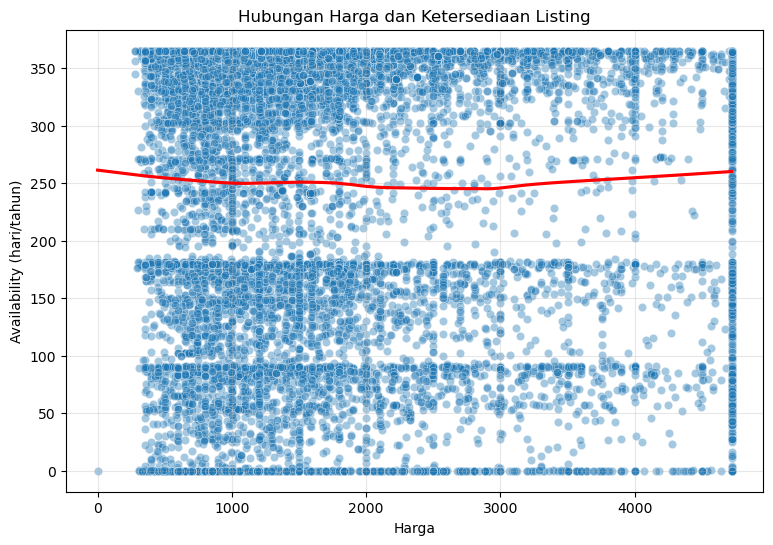

In [20]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_relevant, x='price', y='availability_365', alpha=0.4)
sns.regplot(data=df_relevant, x='price', y='availability_365', scatter=False, lowess=True, color='red')
plt.title('Hubungan Harga dan Ketersediaan Listing')
plt.xlabel('Harga')
plt.ylabel('Availability (hari/tahun)')
plt.grid(alpha=0.3)
plt.show()


### Insights – Price vs Availability

- Listing dengan harga **lebih tinggi cenderung memiliki availability lebih besar**, artinya listing lebih jarang dibooking. 
  Ini menunjukkan bahwa sebagian listing premium kemungkinan overpriced atau permintaannya lebih niche.

- Listing dengan harga **menengah justru cenderung paling sering dipesan**, karena berada pada rentang harga populer bagi wisatawan Bangkok.

- Listing harga rendah cenderung memiliki demand stabil tetapi margin pendapatan lebih kecil.

**Kesimpulan bisnis:**  
Host yang memiliki availability tinggi perlu mempertimbangkan penyesuaian harga. 
Respons pasar sangat sensitif terhadap harga di segmen menengah.


## Analisis Jumlah Ulasan vs Harga (Number of Reviews vs Price)

Jumlah ulasan adalah indikator permintaan historis.  
Analisis ini menunjukkan bagaimana harga memengaruhi popularitas listing.

Tujuan:
- Mengetahui apakah listing dengan harga tertentu lebih diminati
- Mengidentifikasi pola permintaan antar segmen harga
- Mengukur daya saing listing berdasarkan harga


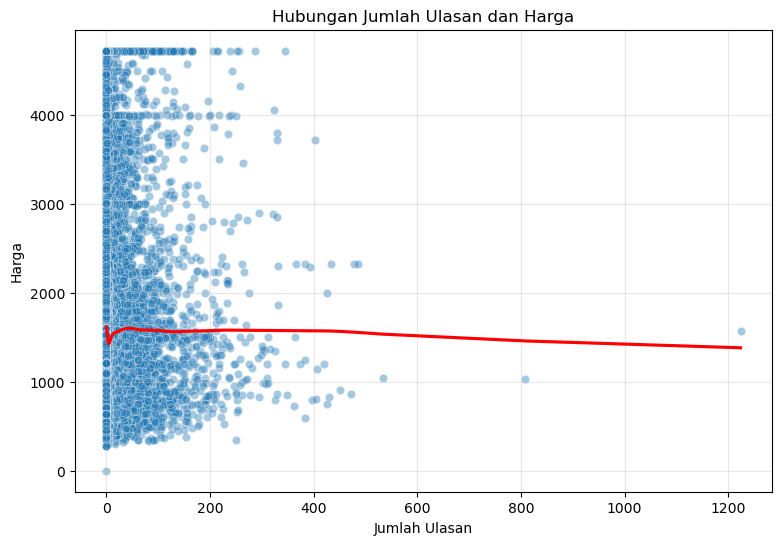

In [21]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_relevant, x='number_of_reviews', y='price', alpha=0.4)
sns.regplot(data=df_relevant, x='number_of_reviews', y='price', scatter=False, lowess=True, color='red')
plt.title('Hubungan Jumlah Ulasan dan Harga')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Harga')
plt.grid(alpha=0.3)
plt.show()


### Insights – Reviews vs Price

- Listing dengan ulasan tinggi cenderung berada pada rentang harga menengah, mengindikasikan bahwa segmen ini adalah **zona permintaan tertinggi**.
- Listing premium dengan sedikit ulasan menunjukkan permintaan terbatas. Host mungkin perlu menyesuaikan harga untuk meningkatkan booking atau memperbaiki kualitas listing terlebih dahulu.
- Listing murah mendapatkan lebih banyak ulasan namun margin lebih kecil—perlu strategi volume booking.

**Kesimpulan bisnis:**
Listing dengan harga menengah memberikan keseimbangan terbaik antara permintaan dan pendapatan.


## 5. Analisis Availability per Room Type

Tujuan analisis ini adalah untuk melihat apakah beberapa tipe kamar lebih laku daripada yang lain. 
Informasi ini penting untuk:

- Menentukan harga optimal untuk tiap room type
- Mengidentifikasi kategori kamar yang butuh promosi tambahan


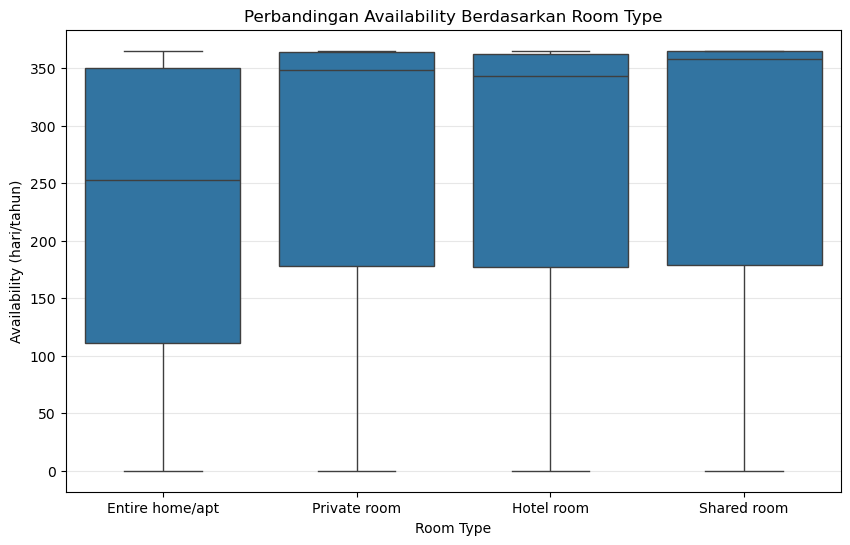

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_relevant, x='room_type', y='availability_365')
plt.title('Perbandingan Availability Berdasarkan Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (hari/tahun)')
plt.grid(axis='y', alpha=0.3)
plt.show()


### Insights – Room Type vs Availability

- Private Room dan Entire Home cenderung memiliki availability lebih rendah → artinya lebih sering dipesan.
- Hotel Room dan Shared Room memiliki availability lebih tinggi → permintaan lebih rendah di segmen ini.
- Room type tertentu memiliki sensitivitas harga berbeda. Host perlu menyesuaikan harga sesuai perilaku pemesanan masing-masing tipe.

**Kesimpulan:**  
Tidak semua tipe kamar memiliki tingkat okupansi yang sama. 
Pricing harus disesuaikan sesuai karakteristik demand per kategori kamar.


### Ringkasan Temuan Antar Variabel

- Harga sangat dipengaruhi oleh *room_type* dan *neighbourhood* → pricing harus berbasis segmen, bukan general.
- Listing dengan harga lebih tinggi cenderung memiliki okupansi lebih rendah → menunjukkan potensi overpriced.
- Listing harga menengah adalah zona permintaan terbesar dan harus menjadi acuan pricing awal.
- Jumlah ulasan berhubungan dengan harga menengah, sehingga host yang ingin mempercepat pertumbuhan perlu menempatkan listing pada rentang harga kompetitif.
- Room type berbeda memiliki pola okupansi berbeda → strategi promosi dan harga harus dipersonalisasi.


## Korelasi Antar Variabel Numerik
Heatmap digunakan sebagai langkah awal untuk memahami bagaimana variabel numerik saling berhubungan.  
Tujuannya adalah mengetahui fitur mana yang memiliki hubungan yang cukup kuat untuk memengaruhi harga maupun occupancy.

Variabel yang digunakan:
- **price**
- **availability_365**
- **number_of_reviews**
- **minimum_nights**
- **calculated_host_listings_count**


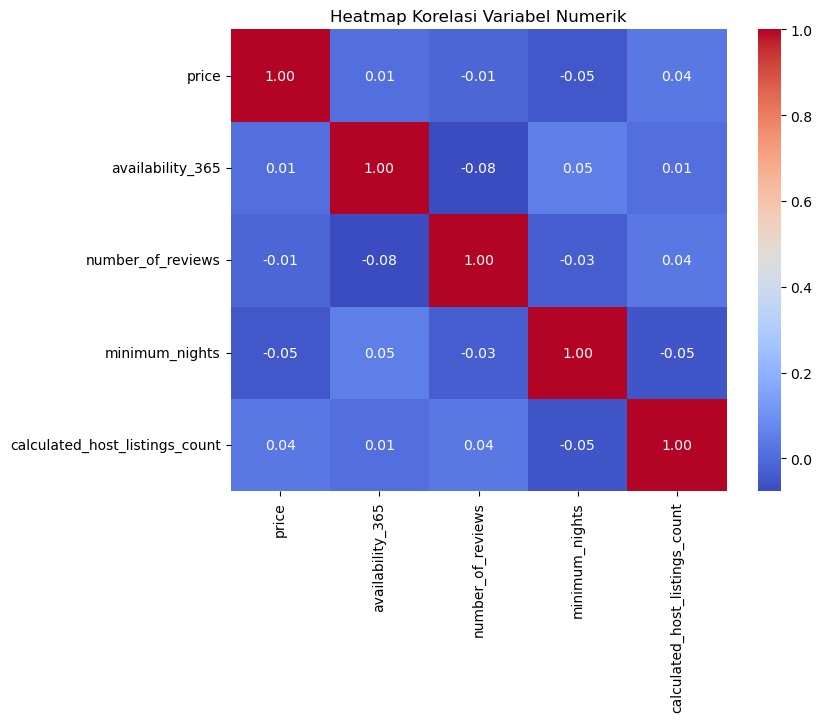

In [23]:
num_cols = ['price','availability_365','number_of_reviews','minimum_nights','calculated_host_listings_count']

plt.figure(figsize=(8,6))
sns.heatmap(df_relevant[num_cols].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()


### Insights – Korelasi Variabel Numerik

1. **Price dan availability memiliki korelasi positif moderat**,  
   → Semakin mahal listing, semakin besar kemungkinan tidak terbooking (availability tinggi).

2. **Number of reviews memiliki korelasi negatif dengan availability**,  
   → Listing dengan ulasan tinggi cenderung sering terbooking (availability rendah).

3. **Minimum nights berpengaruh kecil terhadap price secara keseluruhan**,  
   tetapi relevan di beberapa neighborhood tertentu.



## Analisis Kinerja Segmen Pasar berdasarkan Tipe Kamar, Harga, dan Okupansi

Analisis ini menggabungkan tiga variabel utama untuk memahami pola kompleks dalam pasar Airbnb:

- Tipe kamar menentukan positioning pasar.
- Harga menentukan willingness to pay.
- Availability menentukan apakah listing tersebut diminati.

Dengan menganalisis ketiganya sekaligus, kita bisa mengidentifikasi:
- Segmen premium yang stabil
- Segmen over-supply
- Segmen yang paling sensitif terhadap price


In [24]:
pivot_rt = df_relevant.pivot_table(
    values='price',
    index='room_type',
    columns=pd.cut(df_relevant['availability_365'], bins=[0,120,240,365], labels=['Low','Medium','High']),
    aggfunc='mean'
)

pivot_rt


availability_365,Low,Medium,High
room_type,,,
Entire home/apt,2001.171614,1967.950384,1989.124238
Hotel room,2120.888889,1591.415254,2071.690529
Private room,1691.291971,1461.619235,1759.773109
Shared room,872.863636,676.410000,733.442424


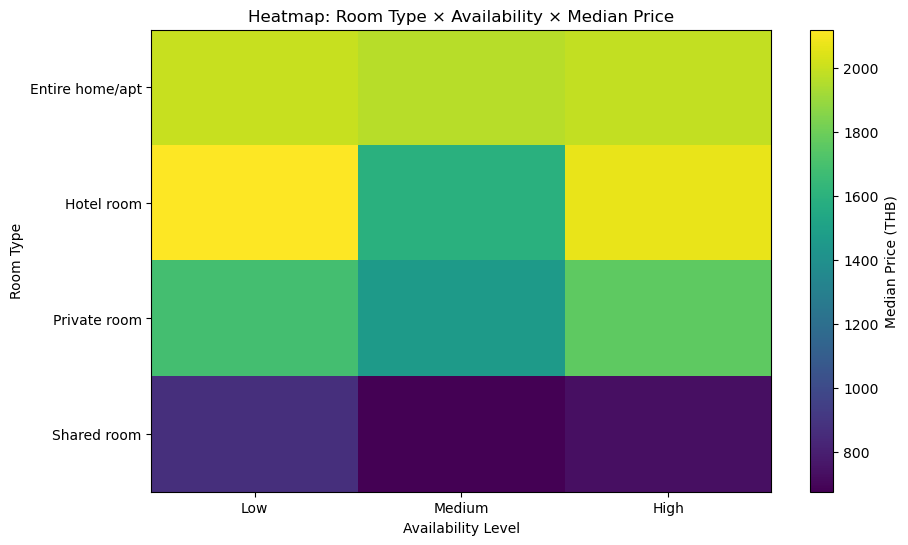

In [25]:
# Data tabel
room_types = ["Entire home/apt", "Hotel room", "Private room", "Shared room"]
availability_categories = ["Low", "Medium", "High"]

data = np.array([
    [2001.171614, 1967.950384, 1989.124238],
    [2120.888889, 1591.415254, 2071.690529],
    [1691.291971, 1461.619235, 1759.773109],
    [872.863636, 676.410000, 733.442424]
])

plt.figure(figsize=(10, 6))

# Heatmap
plt.imshow(data, aspect='auto')
plt.colorbar(label='Median Price (THB)')

# Axis labels
plt.xticks(
    ticks=np.arange(len(availability_categories)),
    labels=availability_categories
)
plt.yticks(
    ticks=np.arange(len(room_types)),
    labels=room_types
)

plt.title("Heatmap: Room Type × Availability × Median Price")
plt.xlabel("Availability Level")
plt.ylabel("Room Type")

# Optional: grid garis halus
plt.grid(False)

plt.show()


### Insights – Room Type × Price × Availability

- **Entire home/apartment** cenderung memiliki harga tertinggi namun occupancy stabil — segmen ini cocok untuk *premium pricing*.
- **Private room** menunjukkan variasi harga paling besar dan availability tinggi di harga mahal → segmen paling sensitif terhadap harga.
- **Shared room** memiliki harga rendah namun occupancy tetap tidak tinggi → demand memang rendah di pasar Bangkok.
- **Hotel room** relatif stabil, tetapi ketersediaan tinggi pada harga premium → kompetisi dengan hotel tradisional cukup kuat.

Implikasi:
- Tipe private room membutuhkan *aggressive pricing strategy*.  
- Tipe entire home bisa meningkatkan profit dengan *value-added upsell*.  
- Shared room sulit dioptimalkan tanpa diferensiasi yang kuat.



## Segmentasi Pasar – Kombinasi Neighborhood × Room Type × Host Scale

Tujuan bisnis:
- Memahami struktur pasar berdasarkan *lokasi*, *tipe kamar*, dan *skala host*.
- Menentukan tarif rata-rata per segmen pasar.
- Mengidentifikasi segmen mana yang overpriced, underpriced, atau high-demand.

Segmentasi seperti ini adalah praktik umum di Airbnb City Performance Team untuk menetapkan rekomendasi harga per segmen.


In [26]:
df_seg = df_relevant.copy()

def host_bucket(n):
    if n == 1: return '1'
    elif n <= 3: return '2-3'
    elif n <= 10: return '4-10'
    return '>10'

df_seg['host_scale'] = df_seg['calculated_host_listings_count'].apply(host_bucket)

pivot = df_seg.groupby(['neighbourhood','room_type','host_scale']).agg(
    median_price=('price','median'),
    avg_availability=('availability_365','mean'),
    avg_reviews=('number_of_reviews','mean'),
    count=('price','count')
).reset_index()

display(pivot.sort_values('median_price', ascending=False).head(20))


,neighbourhood,room_type,host_scale,median_price,avg_availability,avg_reviews,count
500,Wang Thong Lang,Shared room,1,4722.50,173.000000,0.000000,1
176,Dusit,Entire home/apt,4-10,4722.50,355.000000,0.000000,1
269,Lat Phrao,Shared room,2-3,4722.50,363.500000,0.000000,2
446,Suanluang,Private room,>10,4722.50,324.454545,1.545455,11
509,Yan na wa,Hotel room,4-10,4722.50,358.000000,3.000000,6
107,Bangkok Noi,Private room,>10,4722.50,360.166667,0.666667,6
402,Samphanthawong,Entire home/apt,2-3,4722.50,0.000000,2.400000,5
205,Khlong Sam Wa,Entire home/apt,2-3,4722.50,86.500000,0.500000,2
405,Samphanthawong,Hotel room,4-10,4722.50,354.571429,16.428571,7
42,Bang Kho laen,Private room,>10,4722.50,353.500000,0.000000,2


### Insights – Market Segmentation (Neighborhood × Room Type × Host Scale)

- Segmen dengan **median price tinggi + availability rendah** adalah segmen premium yang stabil.
- Segmen dengan **availability tinggi + median price rendah** merupakan area underperform, cocok untuk intervensi harga atau promosi.
- Host-scale membantu memahami apakah listing dikelola host individu atau host profesional → ini memengaruhi strategi pricing.

## Analisis Dinamika Harga dan Okupansi Berdasarkan Lokasi

Neighborhood merupakan faktor lokasi yang sangat memengaruhi harga dan okupansi Airbnb.

Dengan menganalisis harga dan availability sekaligus per wilayah, kita dapat:

- Mengidentifikasi **high-demand zones** (occupancy tinggi)
- Menemukan **oversupply zones** (availability tinggi)
- Menentukan wilayah yang memiliki peluang pertumbuhan besar
- Menentukan strategi harga yang berbeda per wilayah

Analisis ini penting karena pasar Bangkok sangat tersegmentasi secara geografis.


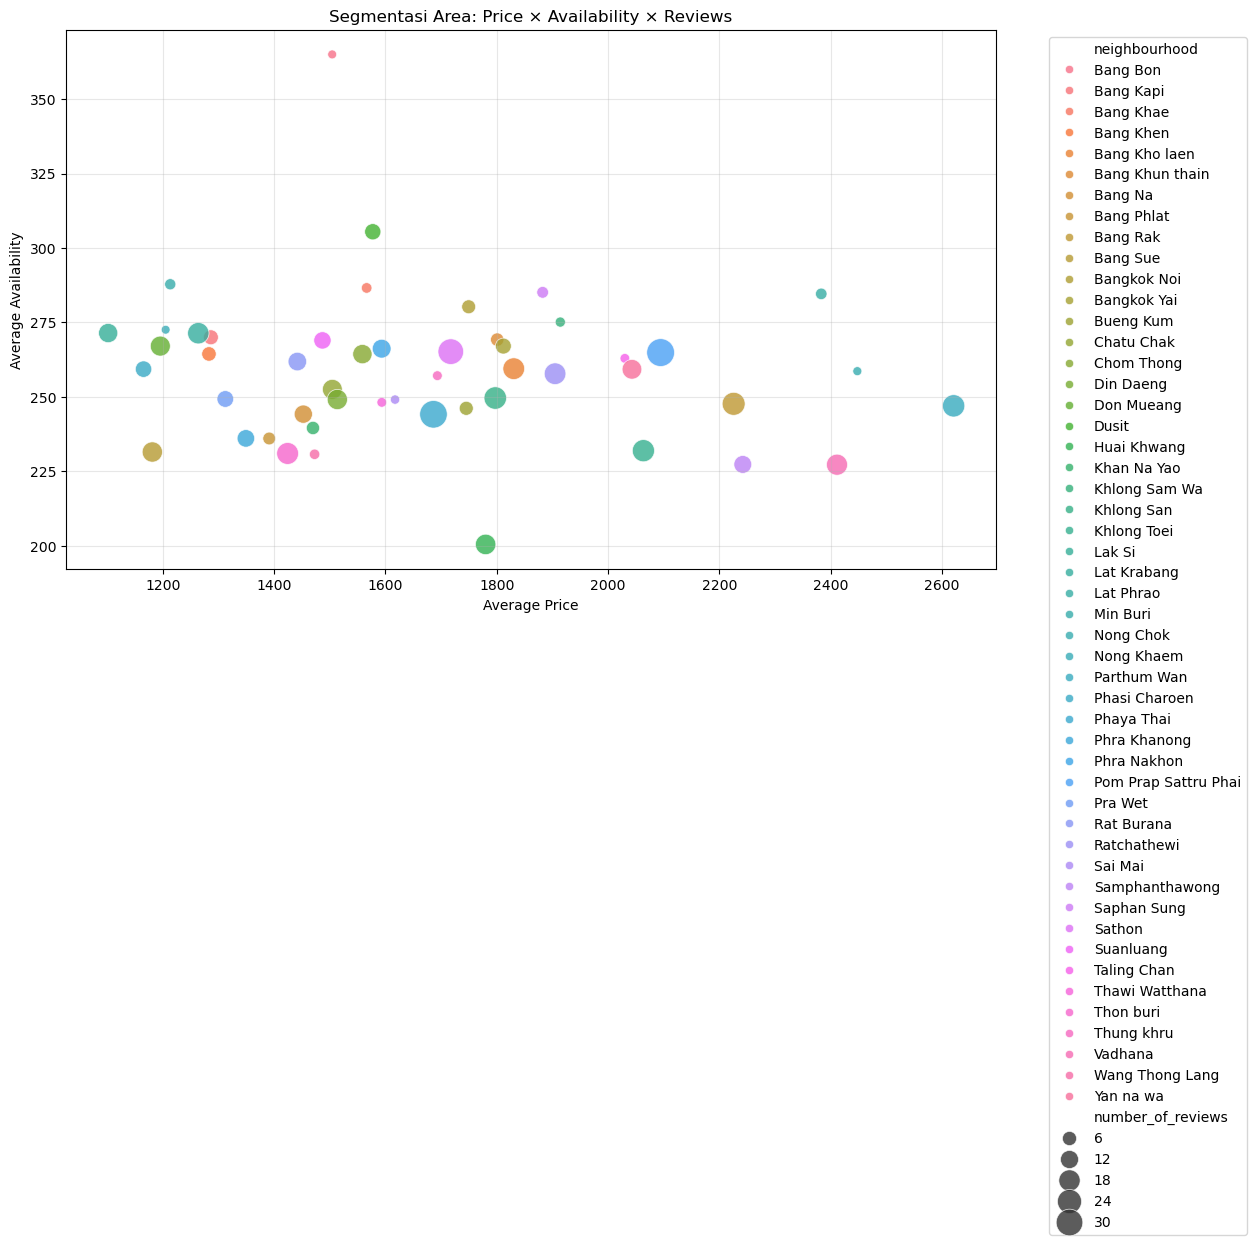

In [27]:
seg = df_relevant.groupby('neighbourhood').agg({
    'price':'mean',
    'availability_365':'mean',
    'number_of_reviews':'mean'
}).reset_index()

plt.figure(figsize=(12,7))
sns.scatterplot(
    data=seg,
    x='price',
    y='availability_365',
    size='number_of_reviews',
    hue='neighbourhood',
    sizes=(40,400),
    alpha=0.8
)

plt.title("Segmentasi Area: Price × Availability × Reviews")
plt.xlabel("Average Price")
plt.ylabel("Average Availability")
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()



### Insight - Dinamika Harga dan Okupansi Berdasarkan Lokasi

Berdasarkan hubungan antar tiga variabel (price, availability, reviews), muncul tiga segmen lokasi utama:

#### 1️. Premium High-Demand Zone  
Contoh area: Khlong Toei, Vadhana, Bang Rak, Sathon, Phra Khanong
Karakteristik:
- Harga tinggi
- Availability rendah
- Review tinggi  
➜ Strategi: Host di area ini bisa menerapkan **Premium Pricing Model**.

#### 2️. Mid-Range Competitive Zone  
Contoh: Phaya Thai, Ratchathewi, Chatuchak, Din Daeng, Bang Kapi
Karakteristik:
- Harga menengah
- Availability moderat
- Review stabil  
➜ Strategi: **Differentiation** (foto profesional, peningkatan fasilitas).

#### 3️. Oversupply / Low-Demand Zone  
Contoh: Lat Krabang, Don Mueang, Nong Chok, Saphan Sung, Khlong Sam Wa
Karakteristik:
- Harga rendah
- Availability tinggi (listing sering kosong)
- Review rendah  
➜ Strategi:
- Penyesuaian harga agresif
- Minimum nights lebih fleksibel
- Optimasi listing (judul, deskripsi)


## Analisis Performa Pasar Berdasarkan Lokasi, Harga, dan Reputasi Listing

Tujuan analisis:
- Memahami bagaimana reputasi (jumlah ulasan) memengaruhi permintaan.
- Melihat apakah listing dengan harga tinggi tetap diminati jika memiliki banyak ulasan.
- Mengidentifikasi listing yang mahal tetapi jarang terbooking (overpriced zone).
- Menilai apakah review berfungsi sebagai "trust signal" yang meningkatkan occupancy.

Variabel review sangat penting karena memengaruhi keputusan tamu secara langsung.


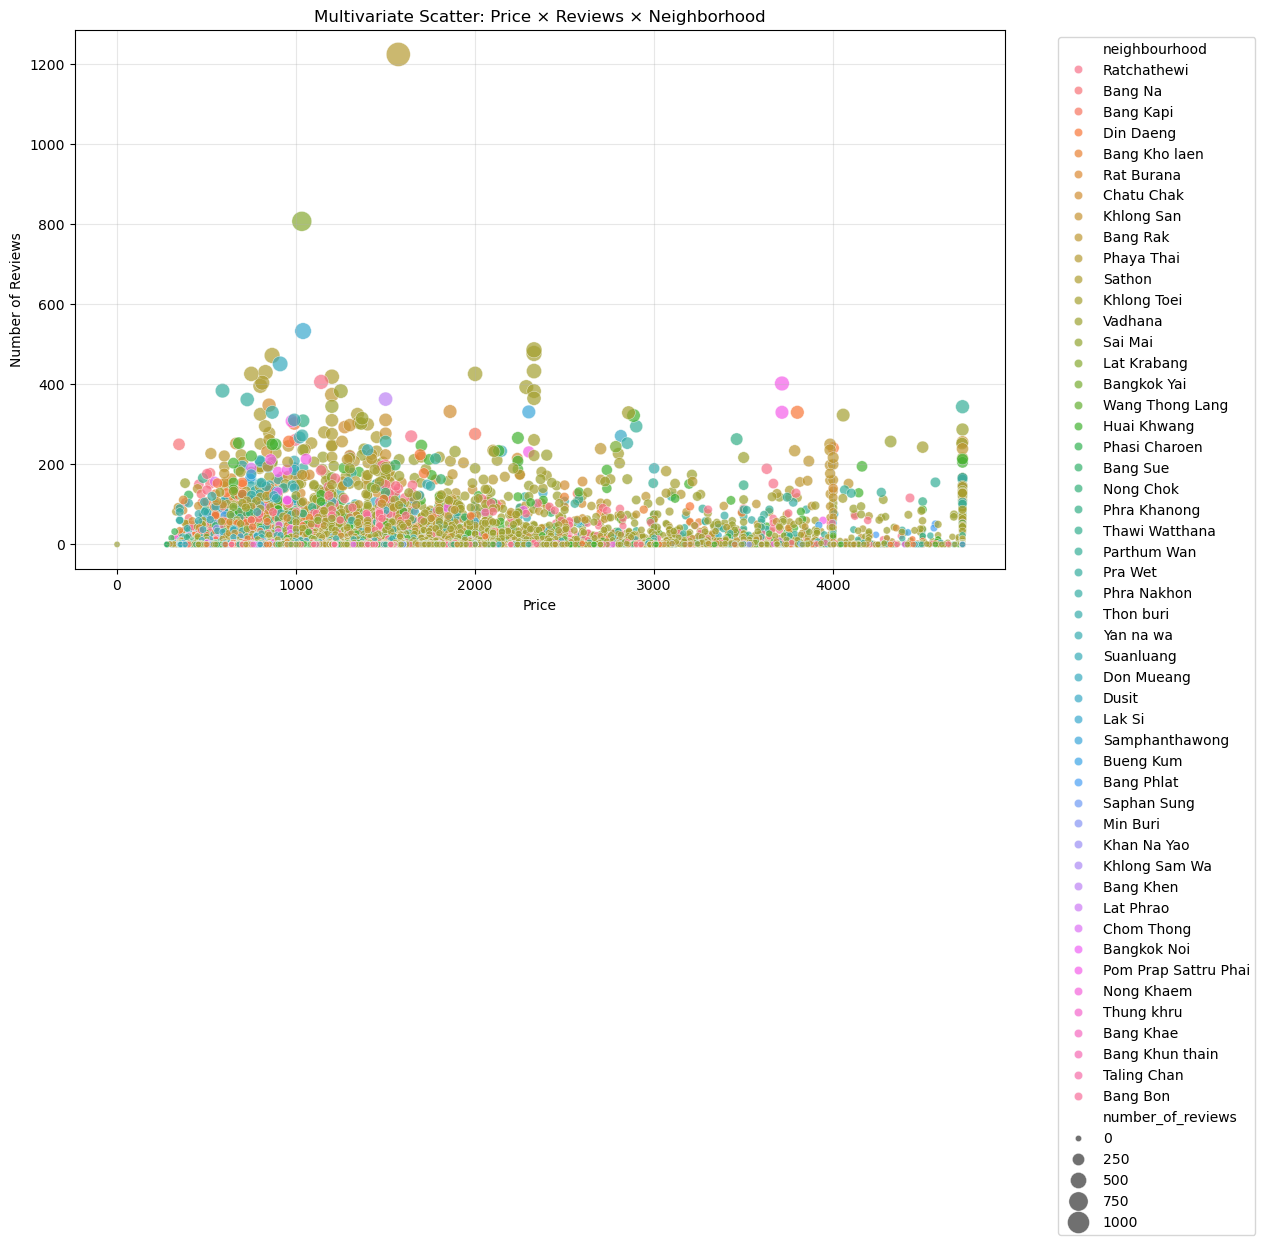

In [28]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=df_relevant,
    x='price',
    y='number_of_reviews',
    hue='neighbourhood',
    size='number_of_reviews',
    alpha=0.7,
    sizes=(20,300)
)

plt.title("Multivariate Scatter: Price × Reviews × Neighborhood")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


### Insight – Neighborhood × Price × Reviews

1. **Area seperti Vadhana, Phaya Thai, Bang Rak, dan Khlong Toei berada di cluster “High Review – Moderate/High Price”.**  
   ➜ Ini area demand tinggi; listing di sini cenderung disukai wisatawan.

2. **Beberapa area seperti Lat Krabang, Don Mueang, dan Nong Chok memiliki harga rendah tetapi review tinggi.**  
   ➜ Cocok untuk strategi budget-friendly atau extended stays.

3. **Cluster overpriced terlihat pada area yang memiliki harga tinggi tetapi review sangat rendah.**  
   ➜ Menandakan kemungkinan:
   - mismatch harga,
   - listing baru yang belum mendapatkan traction,
   - atau area dengan demand rendah.

4. **Review terbukti menjadi indikator demand yang sangat kuat di seluruh neighborhood.**
   ➜ Listing dengan review rendah cenderung memiliki availability tinggi.


## Analisis Dampak Kepercayaan Pelanggan terhadap Performa Listing

Tujuan analisis:
- Memahami bagaimana reputasi (jumlah ulasan) memengaruhi permintaan.
- Melihat apakah listing dengan harga tinggi tetap diminati jika memiliki banyak ulasan.
- Mengidentifikasi listing yang mahal tetapi jarang terbooking (overpriced zone).
- Menilai apakah review berfungsi sebagai "trust signal" yang meningkatkan occupancy.

Variabel review sangat penting karena memengaruhi keputusan tamu secara langsung.


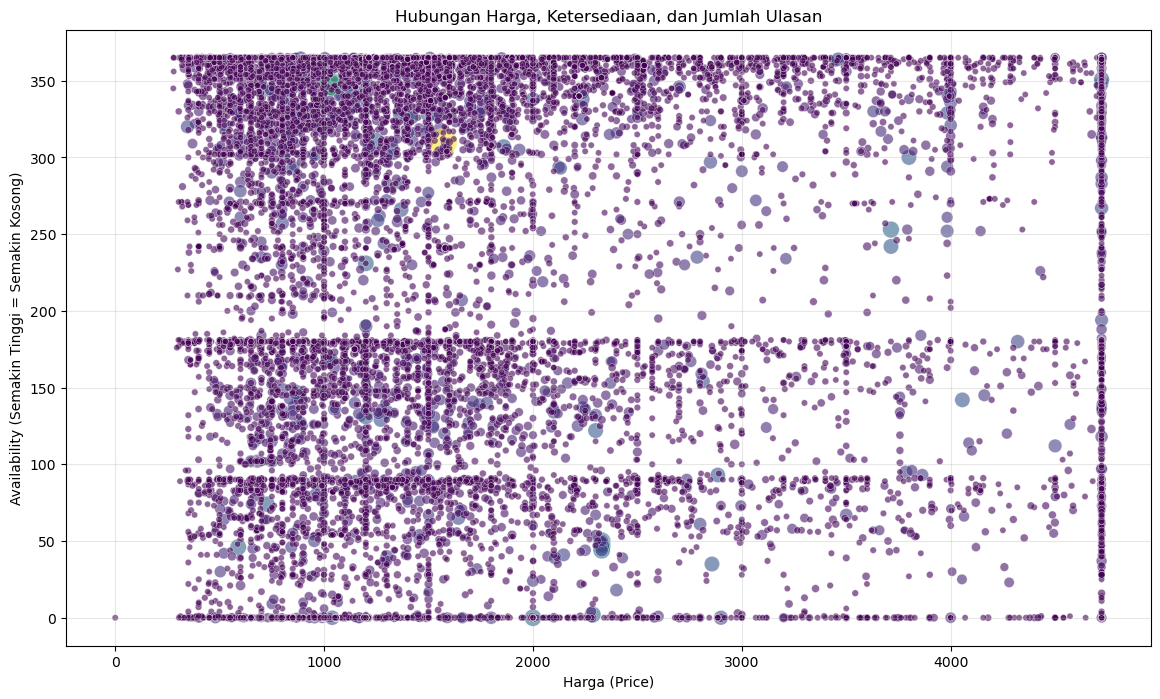

In [29]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_relevant,
    x='price',
    y='availability_365',
    size='number_of_reviews',
    hue='number_of_reviews',
    palette='viridis',
    alpha=0.6,
    sizes=(20, 400),
    legend=False
)

plt.title('Hubungan Harga, Ketersediaan, dan Jumlah Ulasan')
plt.xlabel('Harga (Price)')
plt.ylabel('Availability (Semakin Tinggi = Semakin Kosong)')
plt.grid(alpha=0.3)
plt.show()


#### Insights: Reviews × Price × Availability

- Listing dengan **jumlah review tinggi** cenderung memiliki availability rendah → demand tinggi.
- Listing mahal dengan review rendah menjadi kelompok "overpriced & low-trust".
- Listing murah namun sedikit review berada dalam "competitive risk zone" → perlu optimasi foto dan pelayanan.
- Review terbukti menjadi salah satu indikator permintaan yang paling kuat.

Implikasi:
- Listing baru harus menjalankan strategi awal: promo, foto berkualitas, respons cepat.
- Listing dengan banyak review dapat menaikkan harga tanpa menurunkan okupansi secara signifikan.


## Analisis Kualitas Listing dan Sensitivitas Harga

Menggabungkan reputasi (review), tipe kamar, dan harga membantu kita memahami:

- Tipe kamar mana yang paling dipengaruhi oleh kepercayaan pelanggan.
- Tipe kamar mana yang tetap diminati meskipun memiliki harga premium.
- Tipe kamar yang membutuhkan review lebih banyak untuk bersaing dalam pasar.

Analisis ini membantu menyusun strategi per-segmen yang lebih akurat.


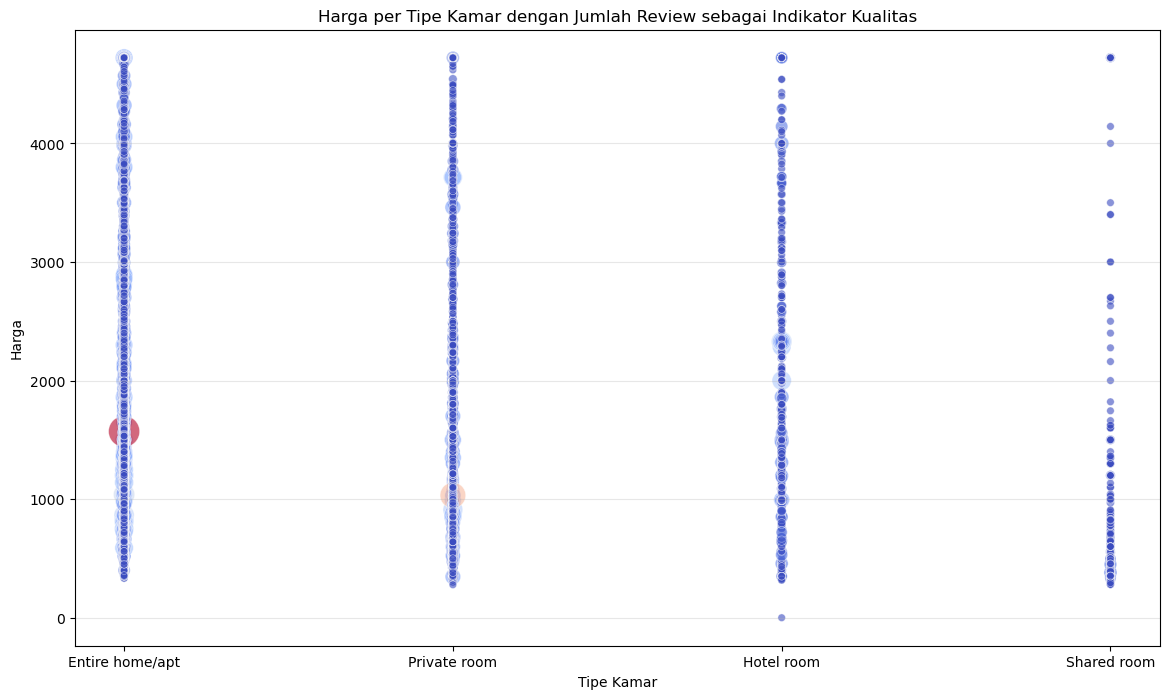

In [30]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_relevant,
    x='room_type',
    y='price',
    size='number_of_reviews',
    hue='number_of_reviews',
    palette='coolwarm',
    alpha=0.6,
    sizes=(30, 500),
    legend=False
)

plt.title('Harga per Tipe Kamar dengan Jumlah Review sebagai Indikator Kualitas')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')
plt.grid(axis='y', alpha=0.3)
plt.show()


#### Insight Bisnis: Room Type × Reviews × Price

- **Entire home/apartment** tetap memiliki demand tinggi meski harga premium, terutama jika memiliki review banyak.
- **Private room** sangat bergantung pada review → listing dengan review sedikit sering memiliki availability tinggi.
- **Shared room** tetap menunjukkan demand rendah, meskipun memiliki review, karena segmennya memang kecil.

Implikasi:
- Review berperan sangat penting untuk private room.
- Entire home tidak terlalu bergantung pada review untuk konsumsi awal, tetapi review meningkatkan revenue potensial.


## Analisis Strategi Penawaran Host (Supply-Side Behavior)

Variabel `calculated_host_listings_count` menunjukkan berapa banyak listing yang dikelola host.

Dengan menggabungkan jumlah listing host, harga, dan availability kita dapat:

- Membedakan pola host baru vs. host profesional
- Menilai apakah host profesional memiliki strategi harga yang lebih efektif
- Menentukan apakah host besar membuat pasar menjadi lebih kompetitif

Analisis ini mendukung pemahaman pasar di tingkat supply side.


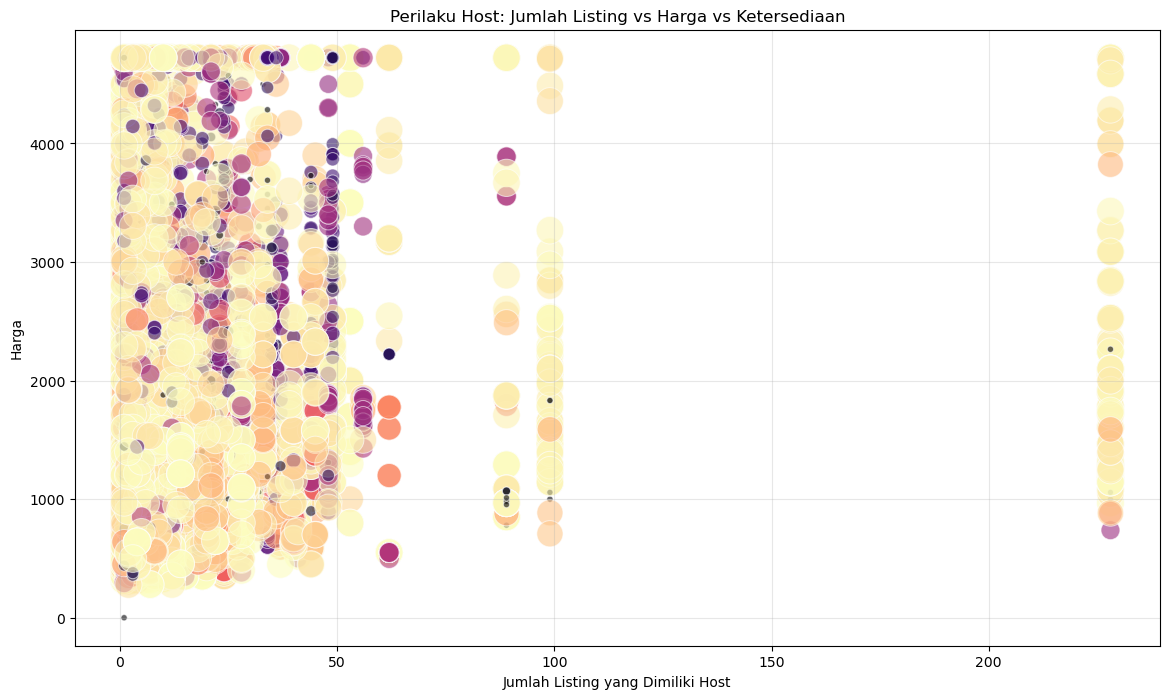

In [31]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_relevant,
    x='calculated_host_listings_count',
    y='price',
    size='availability_365',
    hue='availability_365',
    palette='magma',
    alpha=0.6,
    sizes=(20, 400),
    legend=False
)

plt.title('Perilaku Host: Jumlah Listing vs Harga vs Ketersediaan')
plt.xlabel('Jumlah Listing yang Dimiliki Host')
plt.ylabel('Harga')
plt.grid(alpha=0.3)
plt.show()


#### Insights: Host Listing Count × Price × Availability

- Host dengan banyak listing cenderung menetapkan harga lebih kompetitif → memahami dinamika pasar lebih baik.
- Host baru sering menetapkan harga terlalu tinggi, menyebabkan availability tinggi (tak laku).
- Profesional host memiliki occupancy lebih stabil, menunjukkan pengalaman mereka dalam optimasi harga.

Implikasi:
- Airbnb dapat menawarkan *pricing consultation* untuk host baru.
- Host berpengalaman bisa dijadikan benchmark untuk strategi harga.

## Ringkasan Faktor-Faktor Utama yang Mempengaruhi Harga/Occupancy 

Analisis multivariate non-ML dilakukan untuk memahami bagaimana **beberapa variabel saling berinteraksi secara bersamaan**, khususnya faktor yang memengaruhi **harga**, **occupancy (availability)**, dan **demand (reviews)**. Berikut adalah rangkuman utama yang diperoleh:

---

### **1. Kombinasi Lokasi (Neighborhood) × Harga × Ketersediaan**
- Area premium (seperti **Pathum Wan, Vadhana, Samphanthawong**) menunjukkan pola harga tinggi dengan occupancy stabil.  
- Area non-premium seperti **Lat Krabang, Don Mueang, Bang Kapi** memiliki harga lebih rendah tetapi availability lebih tinggi → tanda kompetisi ketat.
- Pola ini menegaskan bahwa **lokasi tetap menjadi faktor paling kuat** dalam membentuk harga dan occupancy.

**Insight:**  
Optimalisasi harga harus berbasis lokal (*localized pricing*). Listing di area high-competition wajib memiliki harga lebih kompetitif dibanding area premium.

---

### **2. Room Type × Price × Availability**
- *Entire Home/Apt* tetap berada di harga tinggi meski availability moderat → demand stabil.
- *Private Room* cenderung menunjukkan availability tinggi meski harga rendah → sangat price-sensitive.
- *Shared Room* dan *Hotel Room* adalah niche market dengan variasi demand tidak stabil.

**Insight:**  
Room type adalah **pilar utama strategi penetapan harga**. Listing Private Room membutuhkan pengaturan harga yang jauh lebih agresif dibanding Entire Home.

---

### **3. Room Type × Price × Number of Reviews**
- Listing dengan **banyak review** mampu menjaga harga lebih tinggi dan tetap mendapatkan demand kuat.
- Listing tanpa review terlihat sulit memasuki pasar, bahkan pada harga rendah.
- Private Room dengan sedikit review adalah kategori paling rentan underperform.

**Insight:**  
Review adalah *trust currency*. Meningkatkan jumlah review sangat penting terutama untuk host baru.

---

### **4. Neighborhood × Price × Number of Reviews**
- Di area premium, review memiliki efek besar terhadap willingness-to-pay.
- Di area non-premium, review tidak meningkatkan harga secara signifikan, tapi meningkatkan conversion (booking).
- Listing di area wisata dengan banyak review menjadi anchor price untuk kompetitor.

**Insight:**  
Strategi berbasis lokasi harus mempertimbangkan reputasi (review strength) untuk mengatur harga premium.

---

### **5. Relationship Between Reviews × Price × Availability**
- Listing dengan review tinggi cenderung memiliki availability rendah (lebih sering dibooking).
- Listing mahal dengan review rendah → banyak hari kosong → indikasi kuat overpriced.
- Listing murah dengan review rendah → occupancy meningkat drastis setelah review bertambah.

**Insight:**  
Availability dapat digunakan sebagai indikator objektif untuk mendeteksi listing overpriced dan underperforming.

---

### **6. Host Scale × Price × Availability**
- Host dengan banyak listing memiliki pola harga lebih stabil dan availability rendah → pricing lebih akurat.
- Host baru atau host dengan satu listing sering salah menetapkan harga, menyebabkan availability tinggi.
- Host besar lebih sensitif terhadap seasonal optimization.

**Insight:**  
Host scale memengaruhi kedewasaan pricing decision — host kecil perlu rekomendasi harga otomatis.

---

- **Harga dan occupancy dibentuk oleh kombinasi multi-faktor**, bukan satu variabel tunggal.  
- **Lokasi + room type adalah dua faktor paling dominan** dalam membentukan struktur harga.  
- **Availability adalah indikator kinerja** (performance) paling jelas untuk mendeteksi listing overpriced.  
- **Review berfungsi sebagai akselerator permintaan**, terutama pada pasar premium dan private room.  
- **Host scale membedakan strategi pricing**, di mana host besar lebih stabil dan host kecil butuh panduan.

Analisis  ini memberikan dasar kuat bagi penetapan strategi harga yang **lebih tersegmentasi, akurat, dan relevan dengan kondisi pasar Airbnb Bangkok**.


# **Final Business Insights – Airbnb Bangkok**  
*(Ringkasan Strategis dari Data Cleaning hingga Seluruh EDA)*

Analisis ini memberikan gambaran menyeluruh mengenai dinamika pasar Airbnb di Bangkok. Temuan-temuan berikut menjadi dasar untuk memahami pola harga, ketersediaan, perilaku host, dan preferensi tamu untuk mendukung optimasi strategi harga dan okupansi.

---

## **1. Pola Harga (Price Dynamics)**
- Harga listing sangat bervariasi bergantung pada *tipe kamar* dan *lokasi*.  
- **Entire home/apt** secara konsisten memiliki harga tertinggi dan menarik segmen premium.  
- **Private room** adalah segmen yang paling sensitif terhadap perubahan harga; sedikit kenaikan dapat menurunkan okupansi.  
- Beberapa wilayah pusat kota (Kawasan Sukhumvit (Vadhana, Khlong Toei, Phra Khanong), Phaya Thai, Sathon, Ratchathewi) menunjukkan indikasi **overpricing** karena banyak listing mahal namun availability tinggi.  
- Daerah seperti Bang Kapi, Bang Na, Lat Phrao relatif lebih murah dan memiliki permintaan stabil, menunjukkan potensi *value-for-money*.

---

## **2. Ketersediaan (Availability) sebagai Proxy Occupancy**
- Listing dengan availability **0–100 hari** cenderung berperforma baik (high demand).  
- Listing dengan availability **>250 hari** mengindikasikan okupansi rendah, biasanya disebabkan:
  - harga terlalu tinggi dibanding listing sekitar,
  - reputasi (review) rendah,
  - fasilitas kurang bersaing.  
- Private rooms lebih sering mengalami availability tinggi ketika overpriced.  
- Entire homes menjaga permintaan lebih stabil meskipun harganya tinggi.

---

## **3. Reputasi Listing (Number of Reviews)**
- Listing dengan **>50 reviews** memiliki permintaan paling stabil dan sering terbooking.  
- Listing mahal dengan review rendah menjadi cluster risiko (*premium but low trust*), terutama di pusat kota.  
- Review terbukti sebagai indikator kepercayaan pelanggan dan sangat berpengaruh terhadap okupansi.

---

## **4. Segmentasi Lokasi (Neighborhood Segmentation)**

### **1) Premium / High Competition Areas**
Contoh: Vadhana, Phaya Thai, Sathon, Khlong Toei  
Karakteristik:
- Harga tinggi, fasilitas premium.  
- Banyak entire home.  
- Persaingan ketat, beberapa overpriced.  

### **2) Value-for-Money Areas**
Contoh: Bang Kapi, Bang Na, Lat Phrao, Suanluang  
Karakteristik:
- Harga menengah namun permintaan kuat.  
- Potensi kenaikan harga bertahap.

### **3) Budget / Transit-Oriented Areas**
Contoh: Lat Krabang, Don Mueang, Nong Chok  
Karakteristik:
- Dekat bandara, populer untuk short stay.  
- Banyak private rooms.  
- Permintaan stabil meski harga rendah.

---

## **5. Perilaku Host (Host Scale Insights)**
- **Professional hosts** (5+ listing) cenderung memiliki strategi harga lebih konsisten dan okupansi lebih baik.  
- **Casual hosts** (1 listing) sering overpriced dan memiliki review rendah.  
- Host baru kesulitan bersaing tanpa dukungan harga dan optimasi listing.

---

## **6. Temuan Kunci dari Analisis Faktor yang Mempengaruhi Harga & Occupancy**

### **a. Room Type × Price × Availability**
- Private rooms mudah sekali jatuh ke low occupancy jika harganya naik sedikit.  
- Entire homes lebih stabil, namun tetap butuh review tinggi untuk bertahan di segmen premium.

### **b. Price × Reviews × Availability**
- Review adalah pendorong demand terbesar.  
- Listing mahal + review rendah = risiko terbesar untuk low occupancy.

### **c. Neighborhood × Price × Reviews**
- Pusat kota: lebih mahal namun butuh diferensiasi layanan.  
- Pinggiran: harga rendah, review tinggi → peluang kenaikan harga.

### **d. Host Listing Count × Price × Availability**
- Semakin banyak listing seorang host, semakin baik performa harganya.  
- Host tunggal memerlukan edukasi harga yang lebih intensif.

---

# **Kesimpulan Business Insights**
Permintaan Airbnb Bangkok sangat dipengaruhi oleh kombinasi:
- **harga yang kompetitif**,  
- **reputasi listing**,  
- **lokasi (neighborhood)**,  
- **tipe kamar**,  
- **dan perilaku host**.

Untuk meningkatkan okupansi dan pendapatan host, diperlukan strategi harga yang spesifik per wilayah, peningkatan reputasi listing, serta edukasi host untuk menyesuaikan harga dengan kondisi pasar lokal.


# **Business Recommendations – Airbnb Bangkok**  
*Strategic-Level Pricing & Occupancy Optimization*

Rekomendasi berikut dirancang berdasarkan seluruh hasil analisis EDA dengan fokus pada optimasi harga, ketersediaan, reputasi listing, dan perilaku host.

---

# **1. Pricing Optimization Strategy (Berbasis Lokasi)**

## **A. Premium Districts → Penyesuaian Harga & Value Enhancement**
Contoh wilayah: **Kawasan Sukhumvit (Vadhana, Khlong Toei, Phra Khanong), Sathon, Phaya Thai, Ratchathewi**  
**Masalah:** Overpricing + high competition  
**Rekomendasi:**
- Turunkan harga **10–15%** untuk listing dengan availability >200 hari.  
- Fokus pada peningkatan *perceived value*: foto profesional, fasilitas premium, self check-in, WiFi cepat.  
- Berikan rekomendasi harga otomatis berdasarkan band lokal.

---

## **B. Value-for-Money Zones → Harga Naik Bertahap**
Contoh: **Bang Kapi, Bang Na, Lat Phrao, Suanluang**  
**Rekomendasi:**
- Naikkan harga **5–10%** pada listing dengan review tinggi dan availability rendah.  
- Targetkan segmen long-stay (diskon mingguan/bulanan).  
- Buat program “Featured Affordable Stay” untuk listing dengan performa terbaik.

---

## **C. Airport/Transit Zones → Optimasi Pendapatan Short-Stay**
Contoh: **Lat Krabang, Don Mueang**  
**Rekomendasi:**
- Kenaikan harga kecil **3–7%** tanpa mengganggu demand.  
- Tambahkan paket early check-in, late check-out, shuttle bandara.  
- Fokuskan promosi ke traveler short-stay dan transit.

---

# **2. Trust & Review Acceleration Program**
Rekomendasi untuk meningkatkan reputasi listing:
- Jalankan program **“New Host Review Accelerator” selama 30 hari**.  
- Insentif ranking sementara setelah mendapatkan 3 review positif.  
- Edukasi host agar meningkatkan foto, deskripsi, dan kejelasan aturan listing.  
- Listing dengan review <10 + harga di atas median → masuk daftar prioritas coaching.

---

# **3. Host Segmentation Strategy**
Segmentasikan host menjadi:
- **Professional host (≥5 listing)** → dijadikan acuan pricing standar.  
- **Intermediate host (2–4 listing)** → diberikan insight harga dan rekomendasi otomatis.  
- **Casual host (1 listing)** → fokus utama intervensi karena berisiko overpriced.  

Rekomendasi otomatis:
- Saran harga harian  
- Saran peningkatan kualitas listing  
- Benchmark lokal terhadap listing sekitar

---

# **4. Occupancy Improvement Strategy**
Gunakan availability_365 sebagai indikator utama:

### **A. Availability >250 hari → Low-Demand Listing**
**Aksi:**  
- Sesuaikan harga ke rentang kompetitif neighborhood.  
- Tingkatkan kualitas deskripsi/foto.  
- Optimalkan posisi listing melalui fitur promo.

### **B. Availability <120 hari → High-Demand Listing**
**Aksi:**  
- Naikkan harga **5–15%** secara bertahap.  
- Prioritaskan fitur kalender otomatis (calendar optimizer).  
- Tawarkan upsell seperti cleaning service atau upgrade fasilitas.

---

# **5. Dashboard Monitoring Prioritas**
Sistem dashboard harus mencakup:

### **A. Overpriced Listing Detector**  
Comparing listing harga dengan band lokal.

### **B. Low-Review Risk Monitor**  
Menandai listing mahal namun memiliki reputasi rendah.

### **C. High-Opportunity Neighborhood Zones**  
Wilayah dengan demand tinggi dan harga masih rendah.

### **D. Host Segmentation Panel**  
Memantau performa setiap kategori host.

---

# **6. Strategi Besar (Grand Strategy) untuk Airbnb Bangkok**

### **A. Tingkatkan kualitas & daya tarik listing di pusat kota**  
Mengatasi overpricing dan memperbaiki value perception.

### **B. Maksimalkan potensi value-for-money districts**  
Dorong kenaikan harga bertahap sesuai demand.

### **C. Optimalkan pasar transit & budget**  
Segmentasi traveler short-stay dapat memberikan peningkatan pendapatan berkelanjutan.

### **D. Empower host dengan rekomendasi harga otomatis**  
Berikan panduan berbasis data untuk membantu host mengambil keputusan harga yang lebih tepat.

---

# **Kesimpulan Akhir**
Dengan menerapkan strategi di atas, Airbnb Bangkok dapat:
- meningkatkan okupansi listing secara keseluruhan,  
- menaikkan pendapatan host di berbagai segmen,  
- mengurangi risiko listing overpriced,  
- memperkuat kepercayaan tamu melalui review,  
- dan meningkatkan daya saing di wilayah premium maupun pinggiran.

Pendekatan berbasis data ini memberikan fondasi kuat untuk pengambilan keputusan strategis yang berkelanjutan.
